In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.coordinates import SkyCoord

from astropy.io import fits
from astropy.utils.data import download_file
from astropy.wcs import WCS


In [2]:

pks_1934_638_coord = SkyCoord.from_name("PKS 1934-638")
pks_1934_638_coord


<SkyCoord (ICRS): (ra, dec) in deg
    (294.85427796, -63.71267375)>

In [3]:
dss_cutout_filename = download_file(
    f"http://archive.stsci.edu/cgi-bin/dss_search?"
    f"f=FITS&ra={pks_1934_638_coord.ra.degree}&dec={pks_1934_638_coord.dec.degree}"
    f"&width=2&height=2")  # width/height in arcmin

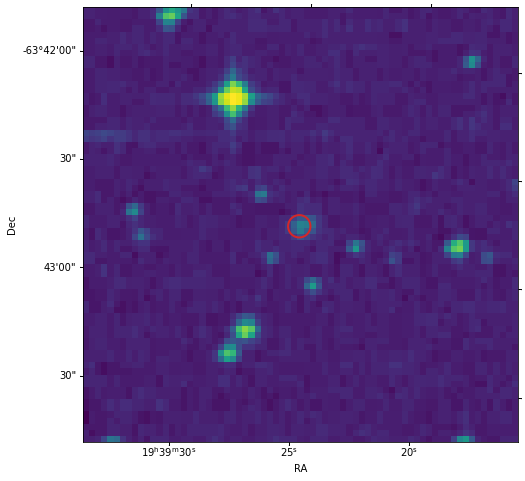

In [4]:
hdu = fits.open(dss_cutout_filename)[0]
wcs = WCS(hdu.header)

fig, ax = plt.subplots(1, 1, figsize=(8, 8),
                       subplot_kw=dict(projection=wcs))
ax.imshow(hdu.data, origin='lower', cmap='viridis')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_autoscale_on(False)

ax.scatter(pks_1934_638_coord.ra.degree,
           pks_1934_638_coord.dec.degree,
           s=500,
           transform=ax.get_transform('world'),
           facecolor='none', linewidth=2, color='tab:red')